# install dependencies

In [16]:
!pip install tensorflow numpy pandas sklearn matplotlib seaborn opencv-python streamlit tensorflow-gpu ipywidgets tensorflow-datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 54.4 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 kB 9.5 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21503 sha256=dfc27f7e5065db0ffd6436091dede23e340b25f239d61dc0b68745abeeb08fa5
  Stored in directory: /home/codespace/.cache/pip/wheels/54/4e/28/3ed0e1c8a752867445bab994d2340724928aa3ab059c57c8db
Successfully built promise


# import dependencies

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
# import matpltolib for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_datasets as tfds


2022-06-10 04:05:37.303013: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-10 04:05:37.303056: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# gpu settings

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

2022-06-10 04:05:58.397765: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-10 04:05:58.397803: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-10 04:05:58.397827: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-0abbee): /proc/driver/nvidia/version does not exist


In [5]:
for gpu in gpus:
    print(gpu)

# data

In [6]:
# get minst data
ds = tfds.load('fashion_mnist', split='train')

2022-06-10 04:06:04.958313: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
# set training data
dataiterator = ds.as_numpy_iterator()
ds.as_numpy_iterator().next()['image']

2022-06-09 16:22:55.814462: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

<Figure size 432x288 with 0 Axes>

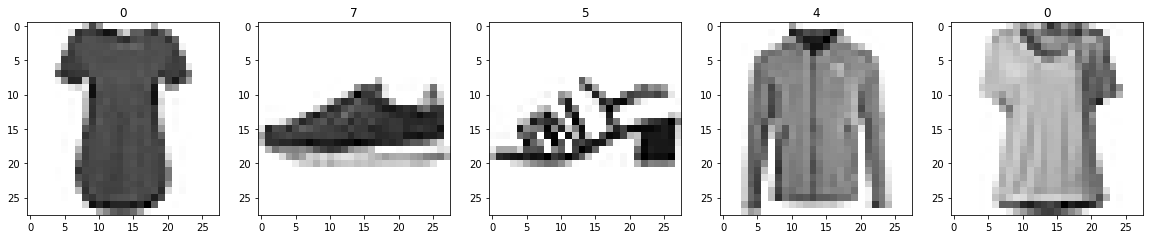

In [37]:
# data visualization
plt.figure()
fig, ax = plt.subplots(ncols=5, figsize=(20, 20))
for idx in np.arange(5):
    sample = dataiterator.next()
    ax[idx].imshow(np.squeeze(sample['image']), cmap = plt.cm.binary)
    ax[idx].title.set_text(sample['label'])

# preprocessing data

In [7]:
# scale images
def scale_images(data):
    image = data['image']
    return image / 255

# tensorflow for data pipelines
map
cache
shuffle
batch
prefetch

In [8]:
ds = tfds.load('fashion_mnist', split='train')
# Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images)
# Cache the dataset for that batch
ds = ds.cache()
# Shuffle it up
ds = ds.shuffle(60000)
# Batch into 128 images per sample
ds = ds.batch(128)
# Reduces the likelihood of botlenecking
ds = ds.prefetch(64)

In [44]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# build the neural network

#### import modelling components

In [9]:
# Bring in the seequential api for the generator and discriminator
from tensorflow.keras.models import Sequential
# Bring in the layers for the neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

#### Build Generator

In [16]:
def build_generator():
    model = Sequential()
    
    # Takes in random values and reshapes it to 7x7x128
    # Beginning of a random generated image
    model.add(Dense(7*7*128, input_dim = 128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7, 7, 128)))
    
    # Upsampling block 1
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    # Upsampling block 2
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    # Convolutional block 1
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))

    #Convolutional block 2
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))

    # Conv Layer to get to one channel
    model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))
    # 1 kernel, 4x4 kernel size, sigmoid activation
    return model

In [19]:
generator = build_generator()

In [20]:
generator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_3 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_5 (UpSampling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                      

In [ ]:
# TEST
img = generator.predict(np.random.randn(4, 128, 1))
img

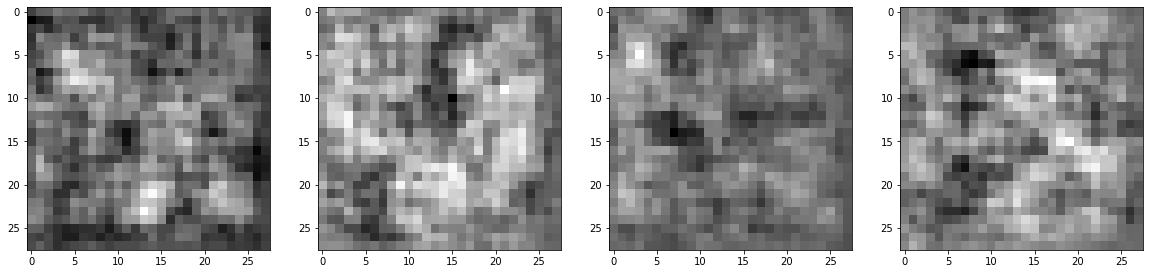

In [23]:
# visualization 
fix, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(img):
    ax[idx].imshow(np.squeeze(img), cmap=plt.cm.binary)
    

#### Build Discriminator

In [34]:
def build_discrimnator():
    '''model
    model for classifying fashion images, 0 = False, 1 = True'''
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, 5, input_shape = (28, 28, 1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Secod Conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Third Conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Fourth Conv Block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    return model

In [35]:
discriminator = build_discrimnator()

In [36]:
discriminator.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_2 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 128)      

In [39]:
discriminator.predict(np.expand_dims(img, 0))

1/1 [==============================] - 0s 62ms/step


array([[0.5018518]], dtype=float32)

# Construct Training Loop

Setup Losses and Optimizers

In [43]:
# adam is going to be the optimizer
from tensorflow.keras.optimizers import Adam
# Binary/Sparse cross entropy is going to be the loss for both
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy

In [45]:
# define learning rate and losses
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

Build Subclassed Model

In [48]:
# Import the base model class to subclass for training step
from tensorflow.keras.models import Model

In [91]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class
        super().__init__(*args, **kwargs)
        
        # Create attributes for gen and disc
        self.generator = generator
        self.discriminator = discriminator

    def __repr__(self):
        return "{} model".format(self.__class__.__name__)

    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        # Compile with base class
        super().compile(*args, **kwargs)

        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, batch):
        # Get the data
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)

        # Train the discriminator 
        with tf.GradientTape() as d_tape:
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
        
            # Create Labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis = 0)
            # Add some noise to the outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            # Calculate Loss - BinaryCross
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            
        # Apply backpropagation - nn Learn
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

        # Train the generator
        with tf.GradientTape() as g_tape:
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128, 128, 1)), training=True)
            #Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        # return
        return {"d_loss": total_d_loss, "g_loss": total_g_loss}

In [92]:
# Create an instance of fashionGan
fashgan = FashionGAN(generator, discriminator)

In [93]:
# Compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

Build Callback

In [58]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [63]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim, 1))
        generated_images = self.model.generator(random_latent_vectors)
        # denormalization
        generated_images *= 255
        generated_images.numpy()
        for i in np.arange(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path('images', f'generated_img_{epoch}_{i}.png'))

Train

In [64]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [97]:
# Recommend 2000 epochs
hist = fashgan.fit(ds, epochs=2, callbacks=[ModelMonitor()])

Epoch 1/2
195/469 [===========>..................] - ETA: 41:55 - d_loss: 0.4850 - g_loss: 0.7137

Review Performance

In [89]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

NameError: name 'hist' is not defined

<Figure size 432x288 with 0 Axes>

# Test Out the Generator

Generate Images

In [96]:
# load model
generator.load_weights('generatormodel.h5')

ValueError: axes don't match array

In [ ]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))

In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(20, 20))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

Save the Model

In [ ]:
generator.save